In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

### Data Exploration

In [2]:
data_path = 'ascii_data/ascii_art_data.json'
df = pd.read_json(data_path)
df.head()

,topic,pre_suffix,text
0,aardvarks,LG,z A_A_R_D_V_A_R_K_O ///////////...
1,aardvarks,SM,"_.---._ /\\\r\n ./' ""--`\//..."
2,aardvarks,None,"_.---._ /\\\r\n ./' ""--`\//..."
3,aardvarks,SM,",__ _, ___\r\n '.`\ /`| ..."
4,aardvarks,SM,"_,,......_\r\n ..."


In [3]:
print(df['text'][1])

       _.---._    /\\
    ./'       "--`\//
  ./              o \          .-----.
 /./\  )______   \__ \        ( help! )
./  / /\ \   | \ \  \ \       /`-----'
   / /  \ \  | |\ \  \7--- ooo ooo ooo ooo ooo ooo


In [4]:
def calculate_size(ascii_art: str) -> tuple[int, int]:
    lines = ascii_art.split('\r\n')
    width = max([len(line) for line in lines])
    height = len(lines)
    return width, height

In [5]:
# Add width and height columns to the dataframe
df['width'], df['height'] = zip(*df['text'].map(calculate_size))
df.head()

,topic,pre_suffix,text,width,height
0,aardvarks,LG,z A_A_R_D_V_A_R_K_O ///////////...,75,4
1,aardvarks,SM,"_.---._ /\\\r\n ./' ""--`\//...",51,6
2,aardvarks,None,"_.---._ /\\\r\n ./' ""--`\//...",30,7
3,aardvarks,SM,",__ _, ___\r\n '.`\ /`| ...",48,12
4,aardvarks,SM,"_,,......_\r\n ...",51,13


In [6]:
# Get descriptive statistics for the width and height columns
df.describe()

,width,height
count,5224.000000,5224.000000
mean,46.340161,19.593415
std,130.718712,33.012035
min,1.000000,1.000000
25%,22.000000,8.750000
50%,37.000000,15.000000
75%,60.000000,24.000000
max,3459.000000,1804.000000


In [7]:
# Remove all items not between 22 & 60 characters wide OR 8 & 24 characters tall
cleaned_df = df[(df['width'] >= 22) & (df['width'] <= 60) & (df['height'] >= 8) & (df['height'] <= 24)]
cleaned_df.reset_index(drop=True, inplace=True)
cleaned_df.describe()

,width,height
count,1754.000000,1754.000000
mean,37.777081,15.597491
std,10.928587,4.662960
min,22.000000,8.000000
25%,28.000000,12.000000
50%,36.000000,15.000000
75%,46.000000,19.750000
max,60.000000,24.000000


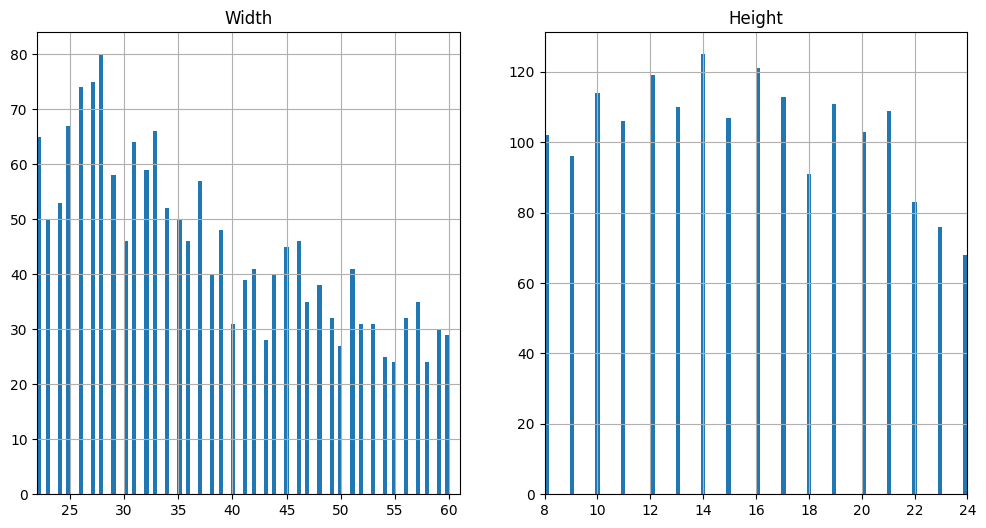

In [8]:
# Draw histogram for width and height
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
cleaned_df['width'].hist(ax=ax[0], bins=100)
ax[0].set_title('Width')
# Max x axis limit to 200
ax[0].set_xlim(22, 61)
cleaned_df['height'].hist(ax=ax[1], bins=100)
ax[1].set_title('Height')
# Max x axis limit to 200
ax[1].set_xlim(8, 24)
plt.show()

In [9]:
# Show first item
print(cleaned_df['text'][9])

    .--.              .--.
   : (\ ". _......_ ." /) :
    '.    `        `    .'
     /'   _        _   `\
    /     0}      {0     \
   |       /      \       |
   |     /'        `\     |
    \   | .  .==.  . |   /
     '._ \.' \__/ './ _.'
jgs  /  ``'._-''-_.'``  \


In [10]:
WIDTH = 60
HEIGHT = 24
def add_whitespace(ascii_art: str) -> str:
    lines = ascii_art.split('\r\n')
    width = max([len(line) for line in lines])
    height = len(lines)
    new_lines = []
    for line in lines:
        new_line = line.center(WIDTH, ' ')
        new_lines.append(new_line)
    # Center the image vertically
    new_lines = new_lines[:HEIGHT]
    new_lines = [' ' * WIDTH] * ((HEIGHT - len(new_lines)) // 2) + new_lines
    new_lines = new_lines + [' ' * WIDTH] * ((HEIGHT - len(new_lines)))
    return '\r\n'.join(new_lines)

In [11]:
cleaned_df['text'] = cleaned_df['text'].map(add_whitespace)
cleaned_df['width'], cleaned_df['height'] = zip(*cleaned_df['text'].map(calculate_size))
cleaned_df.head()

/var/folders/_1/1svnsfjd2bg_frmt3qhvd4th0000gn/T/ipykernel_20828/2255420325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['text'] = cleaned_df['text'].map(add_whitespace)
/var/folders/_1/1svnsfjd2bg_frmt3qhvd4th0000gn/T/ipykernel_20828/2255420325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['width'], cleaned_df['height'] = zip(*cleaned_df['text'].map(calculate_size))


,topic,pre_suffix,text,width,height
0,aardvarks,SM,...,60,24
1,aardvarks,SM,...,60,24
2,amoeba,None,...,60,24
3,bats,SM,...,60,24
4,bats,None,...,60,24


In [13]:
# Print the first item
print(cleaned_df['text'][0])

                                                            
                                                            
                                                            
                                                            
                                                            
                                                            
                    ,__    _,            ___                
                   '.`\ /`|     _.-"```   `'.               
                    ; |  /   .'             `}              
                    _\|\/_.-'                 }             
               _.-"a                 {        }             
            .-`  __    /._          {         }\            
           '--"`  `""`   `\   ;    {         } \            
                          |   } __ _\       }\  \           
                         |  /;`   / :.   }`  \  \           
                        | | | .-' /  / /     '. '._         
             jgs    .'__

In [16]:
# Get a list of all unique characters in the dataset
unique_chars = set()
for text in cleaned_df['text']:
    unique_chars.update(set(text))
unique_chars = sorted(list(unique_chars))
print(len(unique_chars))

111


In [14]:
# Save the cleaned data to a new JSON file (just the text)
cleaned_data_path = 'ascii_data/cleaned_ascii_art_data.json'
cleaned_df['text'].to_json(cleaned_data_path)